$\newcommand{mb}[1]{\mathbf{#1}}$

<!-- dom:TITLE: Partial differential equations and finite difference methods. -->
# Numerical methods for the heat equation
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø, modified by André Massing**

Date: **April 22, 2021**
$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
\newcommand{\mrm}[1]{\mathrm{#1}}
$$

In [1]:
import matplotlib.animation as animation
from IPython.core.display import HTML
from matplotlib import cm
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D  # For 3-d plot
from numpy import *
from scipy.linalg import solve  # Solve linear systems
from scipy.sparse import diags  # Greate diagonal matrices


def css_styling():
    try:
        with open("tma4125.css") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass  # Do nothing


# Comment out next line and execute this cell to restore the default notebook style
css_styling()

In [2]:
%matplotlib inline

newparams = {
    "figure.figsize": (10.0, 10.0),
    "axes.grid": True,
    "lines.markersize": 8,
    "lines.linewidth": 2,
    "font.size": 14,
}
rcParams.update(newparams)

 ## The heat equation

In this section we will see how to solve the heat equation by finite difference
methods. It should however be emphasized that the basic strategy can be applied to a lot of different time-dependent PDEs. The heat equation is just an example. 

We are given the equation, well known from the first part of this course:

\begin{align*}
  u_t & = u_{xx}, && 0 \leq x \leq 1 \\ 
  u(0,t) &=g_0(t), \quad u(1,t)=g_1(t), && \text{Boundary conditions} \\ 
  u(x,0) &= f(x) && \text{Initial conditions}
\end{align*}

The equation is solved from $t=0$ to $t=t_{\text{end}}$. 

## Semi-discretization
This is a technique which combines the discretization of boundary problems
explained above with the techniques for solving ordinary differential equations. 

The idea is as follows:

**Step 1:**
Discretise the interval in the $x$-direction: Choose some $M$, let
$\Delta x=1/M$ (since the interval is $[0,1]$) and define the grid points as $x_i=i\Delta
x$, $i=0,1,\dotsc,M$. 

Note that for each grid point $x_i$ the solution $u(x_i,t)$ is a function of $t$
alone. 

**Step 2:**
Fix some arbitrary point time $t$, and discretise the right hand side of the
PDE. Using central differences to approximate $u_{xx}$, this will give

$$
\frac{\partial u}{\partial t}(x_i,t) =
\frac{u(x_{i+1},t)-2u(x_i,t)+u(x_{i-1},t)}{\Delta x^2} + \mathcal{O}(\Delta
x^2).
$$

**Step 3:** 
Ignore the error term $\mathcal{O}(\Delta x^2)$ and replace $u(x_i,t)$ with the
approximation $U_i(t)$ in the formula above. The result is

$$
U'_i(t) = \frac{U_{i+1}(t) - 2 U_i(t) + U_{i-1}(t)}{\Delta x^2}, \qquad i=1,2,\dotsc,M-1,
$$

where $U'_i(t) = dU_i(t)/dt$. 

Note that rewrite the first and last equation using the boundary conditions $U_0(t)=g_0(t)$, $U_M(t)=g_1(t)$:

\begin{align*}
U'_1(t) &= \frac{U_{2}(t) - 2 U_1(t) + U_{0}(t)}{\Delta x^2} = \frac{U_{2}(t) - 2 U_1(t) + g_0(t)}{\Delta x^2}
\\
U'_{M-1}(t) &= \frac{U_{M}(t) - 2 U_{M-1}(t) + U_{M-2}(t)}{\Delta x^2} = 
\frac{g_1(t) - 2 U_{M-1}(t) + U_{M-2}(t)}{\Delta x^2}
\end{align*}

The resulting system, together initial condition $U_i(0) = f(x_i)$, $i=0,1,\dotsc,M$, forms a well defined
system of ordinary differential equations which is usually called a **semi-discretization (in space)** of the PDE.  

The semi-discretized system

$$
\dot{U}_i(t) = \frac{U_{i+1}(t) - 2 U_i(t) + U_{i-1}(t)}{\Delta x^2}, \qquad i=1,2,\dotsc,M-1, \qquad U_0(t)=g_0(t), \qquad U_M(t)=g_1(t),
$$

is a linear ordinary differential equation:

$$
\dot{\mb{U}} =  \frac{1}{\Delta x^2}\big( A \mb{U} + \mb{g}(t)\big),
$$

where

$$
\mb{U} = \left(\begin{array}{c} U_1 \\ U_2 \\ \vdots \\ U_{M-1} \end{array} \right) \in \RR^{M-1}, \qquad
A = \left(\begin{array}{cccc}
      -2 & 1 & \\ 
      1 & \ddots & \ddots \\ 
        &  \ddots & \ddots & 1 \\ 
        &  & 1 & -2
    \end{array}\right) \in  \RR^{M-1,M-1}
\qquad \text{and} \qquad
\mb{g}(t) = \left(\begin{array}{c} g_0(t) \\ 0 \\ \vdots \\ 0 \\ g_1(t) \end{array} \right) \in \RR^{M-1}.
$$

**Step 4:**
Solve the system of ODEs by the method of your preference. 

For instance, the explicit Euler method with step size $\Delta t$ applied to these ODEs is:

$$
U_{i}^{n+1} = U_{i}^n + r \big(\; U_{i+1}^n - 2U_{i}^n
+ U_{i-1}^n\; \big), \quad i=1,2,\dotsc,M-1, \qquad \text{where } r = \frac{\Delta t}{\Delta x^2}.
$$

Thus $U_i^n \approx u(x_i,t_n)$ with $t_n=n\Delta t$.
In order to better distinguish between the space and the time indices,
we have denoted the time indices by superscripts, and the space indices by subscripts.

Let us test this algorithm on two examples.

**Numerical examples 1:** 
Solve the heat equation $u_t=u_{xx}$ on the interval $0<t<1$
with the following initial and boundary values:

\begin{align*}
u(x,0) & = \sin(\pi x), && \text{Initial value,} \\ 
g_0(t) & =g_1(t)=0. && \text{Boundary values.}
\end{align*}

Use stepsizes $\Delta t=1/N$ and $\Delta x=1/M$. 

The analytic solution of this problem is given by

$$
u(x,t) = e^{-\pi^2t}\sin(\pi x).
$$

**Numerical example 2:**
Repeat example 1, but now with the initial values

$$
u(x,0) = \left\{ \begin{array}{ll} 2x, & 0 \leq x \leq 0.5, \\ 2(1-x), & 0.5 < x\leq 2-2x. 
\end{array} \right.
$$

In this case, we have no simple expression of the analytic solution.
We can, of course, write the analytic solution as a Fourier series,
but the evaluation of the Fourier series still requires some form of approximation.

Run the codes below with 
1. $M=4$, $N=20$.

2. $M=8$, $N=40$.

3. $M=16$, $N=80$. 

Both initial values are already implemented. 

## Implementation

We first include a function for plotting the solution.

In [3]:
def plot_heat_solution(x, t, U, txt="Solution"):
    """
    Help function
    Plot the solution of the heat equation
    """

    fig = figure()
    ax = fig.gca(projection="3d")
    T, X = meshgrid(t, x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)  # Rotate the figure
    xlabel("t")
    ylabel("x")
    title(txt);

Define the problem, this time in terms of initial values and boundary conditions.

In [4]:
# Initial condition


def f1(x):  # Example 1
    return sin(pi * x)


def f2(x):  # Example 2
    y = 2 * x
    y[x > 0.5] = 2 - 2 * x[x > 0.5]
    return y


f = f2

# Boundary conditions


def g0(t):
    return 0


def g1(t):
    return 0

The main part of the code is:

In [5]:
# Solve the heat equation by a forward difference in time (forward Euler)
#
M = 8  # Number of intervals in the x-direction
Dx = 1 / M
x = linspace(0, 1, M + 1)  # Gridpoints in the x-direction

tend = 0.5
N = 40  #  Number of intervals in the t-direction
Dt = tend / N
t = linspace(0, tend, N + 1)  # Gridpoints in the t-direction

# Array to store the solution
U = zeros((M + 1, N + 1))
U[:, 0] = f(x)  # Initial condition U_{i,0} = f(x_i)

r = Dt / Dx**2
print("r =", r)

# Main loop
for n in range(N):
    U[1:-1, n + 1] = U[1:-1, n] + r * (U[2:, n] - 2 * U[1:-1, n] + U[0:-2, n])
    U[0, n + 1] = g0(t[n + 1])
    U[M, n + 1] = g1(t[n + 1])

r = 0.8


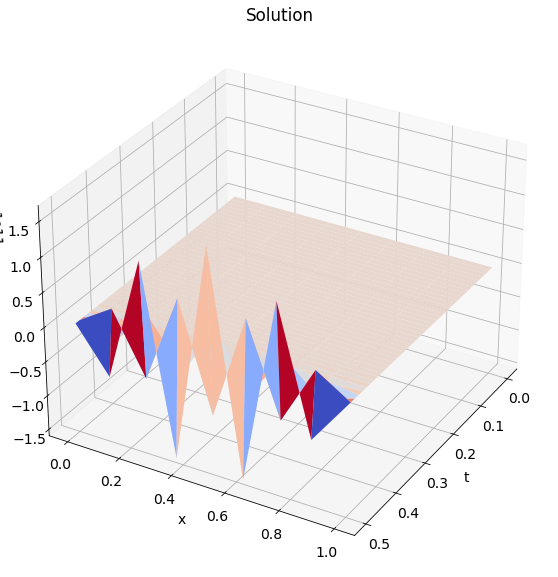

In [6]:
# Plot the numerical solution
plot_heat_solution(x, t, U)

In [7]:
# Plot the error from example 1


def u_exact(x, t):
    return exp(-(pi**2) * t) * sin(pi * x)


T, X = meshgrid(t, x)
error = u_exact(X, T) - U
# plot_heat_solution(x, t, error, txt='Error')
print(
    f"Maximum error: {max(abs(error.flatten())):.3e}"
)  # Maximal error over the whole array

Maximum error: 1.657e+11


The solution is stable for $M=4$, $N=20$, and apparently unstable for $M=16$, $N=80$. 
Why?  

## Stability analysis

The semi-discretized system

$$
\dot{U}_i(t) = \frac{U_{i+1}(t) - 2 U_i(t) + U_{i-1}(t)}{\Delta x^2}, \qquad i=1,2,\dotsc,M-1, \qquad U_0(t)=g_0(t), \qquad U_M(t)=g_1(t),
$$

is a linear ordinary differential equation:

$$
\dot{\mb{U}} =  \frac{1}{\Delta x^2}\big( A \mb{U} + \mb{g}(t)\big),
$$

where

$$
\mb{U} = \left(\begin{array}{c} U_1 \\ U_2 \\ \vdots \\ U_{M-1} \end{array} \right) \in \RR^{M-1}, \qquad
A = \left(\begin{array}{cccc}
      -2 & 1 & \\ 
      1 & \ddots & \ddots \\ 
        &  \ddots & \ddots & 1 \\ 
        &  & 1 & -2
    \end{array}\right) \in  \RR^{M-1,M-1}
\qquad \text{and} \qquad
\mb{g}(t) = \left(\begin{array}{c} g_0(t) \\ 0 \\ \vdots \\ 0 \\ g_1(t) \end{array} \right) \in \RR^{M-1}.
$$

Stability requirements for such problems were discussed in the note on stiff ordinary differential equation. We proved there that the stability depends on the eigenvalues $\lambda_k$ of the matrix $\frac{1}{\Delta x^2}A$.
For the forward Euler method, it was shown that the step size has to chosen such that
$|\Delta t \lambda_k + 1| \le 1$ for all $\lambda_k$. Otherwise, the numerical solution will be unstable.

Note now that the matrix $A$ is symmetric, which implies that
all its eigenvalues are real. Thus, the stability condition reduces
to the two inequalities $\pm (\Delta t \lambda_k + 1) \le 1$,
which again can be rewritten as the condition that $-2 \le \Delta t \lambda_k \le 0$.

It is possible to prove that the eigenvalues of the matrix $A$ is given by

$$
\lambda_k = -4\sin^2 \big( \frac{k\pi}{M}\big), \qquad k=1,\cdots,M-1.
$$

So all the eigenvalues $\lambda_k$ of $\frac{1}{\Delta x^2}A$ satisfy

$$
-\frac{4}{\Delta x^2} < \lambda _k < 0.
$$

The numerical solution is stable if $\Delta t < -2/\lambda_k$ for all $k$, which means
that we obtain the condition

$$
r = \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}.
$$

This also known as **Courant-Friedrich-Lax (CFL) number**, and the 
stability condition number above is also know as **(parabolic) CFL-condition** (since the heat equation
is the prototype example of a so-called parabolic PDE.)

**Problem 1:**
Repeat the two experiments above (for the two different initial values) to justify the bound above.  
Use $M=16$, and in each case find the corresponding $r$ and observe from the experiments whether the solution is stable or not. 

1. Let $N=256$.

2. Let $N=128$.  

3. Let $N=250$. 

In the last case, it seems like the method is stable for the first initial value, and unstable for the second. Do you have any idea why? (Both solutions will be unstable if integrated over a longer time periode). 

**Hint:** Relate to the Fourier expansion solution of the heat equation from the first part of the course. 

## Implicit methods

The semi-discretized system is an example of a stiff ODE, which can only be handled reasonable efficiently by $A(0)$-stable methods, like the implicit Euler or the trapezoidal rule, see the note on stiff ODEs. 

### Implicit Euler

The implicit Euler method for the discritized system 
$\dot{\mb{U}}=\frac{1}{\Delta x^2}\;\big(A\mb{U} + \mb{g}(t)\big)$ 
is given by

$$
\mb{U}^{n+1} = \mb{U}^{n} + r \,A \mb{U}^{n+1} + r \,\mb{g}(t_{n+1}), \qquad \text{with} \qquad r=\frac{\Delta t}{\Delta x^2}.
$$

where $\mb{U}^n=[U_1^n, U_2^n, \dotsc, U_{M-1}^n]^T$ and $U_i^n \approx u(x_i, t_n)$.

For each time step, the following system of linear equations has to be solved:

$$
(I_{M-1}- r \,A)\mb{U}^{n+1} = \mb{U}^n + r\, \mb{g}(t_{n+1}),
$$

where $I_{M-1}$ is the identity matrix of dimension $(M-1)\times (M-1)$. 

**Error estimate.** The error in the gridpoints can be shown to be of order $\mathcal{O}(\Delta t+ \Delta x^2)$.

### Crank-Nicolson (trapezoidal rule)

The trapezoidal rule applied to the semi-discretized system is often referred to as the *Crank-Nicolson method*. The method is $A(0)$-stable and of order 2 in time, so we can expect better accuracy.
The method is written as:

$$
\mb{U}^{n+1} = \mb{U}^n + \frac{\Delta t}{2\Delta x^2}A\big(\mb{U}^{n+1}+\mb{U}^n\big) + \frac{\Delta t}{2\Delta x^2}\big(\mb{g}(t_n)+\mb{g}(t_{n+1})\big).
$$

So for each timestep the following system of equations has to be solved with respect to $\mb{U}^n$:

$$
(I_{M-1} - \frac{r}{2}A)\mb{U}^{n+1} = (I_{M-1} + \frac{r}{2}A)\mb{U}^{n} + \frac{r}{2}\big(\mb{g}(t_n)+\mb{g}(t_{n+1}\big), \qquad r=\frac{\Delta t}{\Delta x^2}.
$$

**Error estimate.** 
The error in the gridpoints can be shown to be $\mathcal{O}(\Delta t^2 + \Delta x^2)$.

### Implementation

It is possible to solve the system of ODEs directly by the methods developed in the note on stiff ODEs, or by using some other existing ODE solver. For nonlinear problems, this is often advisable (but not always). Mostly for the purpose of demonstration, the implicit Euler method as well as the Crank-Nicolson scheme are implemented directly in the following code. 

For each time step, a system of linear equation has to be solved:

$$
K \mb{U}_{n+1} = \mb{b}
$$

where:

**Implicit Euler:**

$$
K = I_{M-1} - rA, \qquad \mb{b} = \mb{U}_n + r [g_0(t_{n+1}), 0, \dotsc, 0, g_1(t_{n+1})]^T.
$$

**Crank-Nicolson:**

$$
K = I_{M-1} - \frac{r}{2}A, \qquad \mb{b} = (I_{M-1}+\frac{r}{2}A)\mb{U}_n + r \bigg[\frac{1}{2}(g_0(t_n)+g_0(t_{n+1})), 0, \dotsc, 0,\frac{1}{2}(g_1(t_n)+g_1(t_{n+1}))\bigg]^T.
$$

The methods can of course be applied to the problems from Numerical examples 1 and 2. But for the fun of it, we now include a problem with nontrivial boundary conditions. 

**Numerical example 3:**
Solve the equation

$$
u_t = u_{xx}, \qquad u(0,t) = e^{-\pi^2 t}, \quad u(1,t) = -e^{-\pi^2 t}, \quad u(x,0) = \cos(\pi x).
$$

up to $t_{\text{end}}=0.2$ by implicit Euler and Crank-Nicolson. Plot the solution and the error. 
The exact solution is $u(x,t) = e^{-\pi^2t}\cos(\pi x)$. 

Use $N=M$, and $M=10$ and $M=100$ (for example). 
Notice that there are no stability issues, even for $r$ large. 
Also notice the difference in accuracy for the two methods.

In [8]:
def tridiag(v, d, w, N):
    """
    Help function
    Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    """

    e = ones(N)  # array [1,1,...,1] of length N
    A = v * diag(e[1:], -1) + d * diag(e) + w * diag(e[1:], 1)
    return A

In [9]:
# Apply implicit Euler and Crank-Nicolson on
# the heat equation u+t=u_{xx}

# Define the problem of example 3


def f3(x):
    return cos(pi * x)


# Boundary values


def g0(t):
    return exp(-(pi**2) * t)


def g1(t):
    return -exp(-(pi**2) * t)


# Exact solution


def u_exact(x, t):
    return exp(-(pi**2) * t) * cos(pi * x)


f = f3

# Choose method
# method = 'iEuler'
method = "CrankNicolson"


M = 64  # Number of intervals in the x-direction
Dx = 1 / M
x = linspace(0, 1, M + 1)  # Gridpoints in the x-direction

tend = 0.5
N = M  #  Number of intervals in the t-direction
Dt = tend / N
t = linspace(0, tend, N + 1)  # Gridpoints in the t-direction

# Array to store the solution
U = zeros((M + 1, N + 1))
U[:, 0] = f(x)  # Initial condition U_{i,0} = f(x_i)

# Set up the matrix K:
A = tridiag(1, -2, 1, M - 1)
r = Dt / Dx**2
print("r = ", r)
if method == "iEuler":
    K = eye(M - 1) - r * A
elif method == "CrankNicolson":
    K = eye(M - 1) - 0.5 * r * A

Utmp = U[1:-1, 0]  # Temporary solution for the inner gridpoints.

# Main loop over the time steps.
for n in range(N):
    # Set up the right hand side of the equation KU=b:
    if method == "iEuler":
        b = copy(Utmp)  # NB! Copy the array
        b[0] = b[0] + r * g0(t[n + 1])
        b[-1] = b[-1] + r * g1(t[n + 1])
    elif method == "CrankNicolson":
        b = dot(eye(M - 1) + 0.5 * r * A, Utmp)
        b[0] = b[0] + 0.5 * r * (g0(t[n]) + g0(t[n + 1]))
        b[-1] = b[-1] + 0.5 * r * (g1(t[n]) + g1(t[n + 1]))

    Utmp = solve(K, b)  # Solve the equation K*Utmp = b

    U[1:-1, n + 1] = Utmp  # Store the solution
    U[0, n + 1] = g0(t[n + 1])  # Include the boundaries.
    U[M, n + 1] = g1(t[n + 1])

r =  32.0


In [10]:
T, X = meshgrid(t, x)
error = u_exact(X, T) - U
print(f"Maximum error: {max(abs(error.flatten())):.3e}")

Maximum error: 3.928e-05


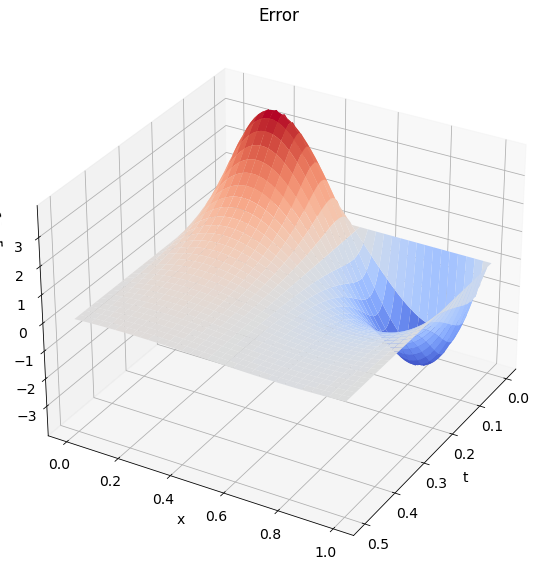

In [11]:
plot_heat_solution(x, t, error, txt="Error")

**Problem 2**

In this problem we will access the convergence rate of the implicit Euler (IE) and the Crank-Nicolson (CN) method.
Thoughout this problem we will use the exact solution $u_{\mrm{ex}}(x,t) = e^{-\pi^2t}\cos(\pi x)$ from **Numerical Example 3**
to calculate the error between the exact and the numerical solution.
As before set $t_{\mrm{end}} = 0.5$

**a)** For $M= 8, 16, 32, 64, 128 $ and $N=M$ compute the discrete solution $U_i^k$ using the implicit Euler method
and compute the discretiztion error as follows
$$
\mrm{err}(N,M) = \max_{k=0,\ldots,N}\max_{i=0,\ldots, M} |u(x_i,t_k) - U_i^k|.
$$
How does the error scale with respect to $N$? How is this related to the error estimate
$\mrm{err}(\delta x, \delta t) =  \mathcal{O}(\Delta t + \Delta x^2)$ for the implicit Euler method?

**b)** Redo a) but this time with Crank-Nicolson and relate your answers to the error estimate
$\mrm{err}(\delta x, \delta t) =  \mathcal{O}(\Delta t^2 + \Delta x^2)$ for the Crank-Nicolsen method.

**c)** Redo a) but this time with $N = M^2$.

**d)** Redo c) but this time with Crank-Nicolson.